# 1.0 Introduction
Deep learning (also known as deep structured learning or hierarchical learning) is part of a broader family of machine learning methods based on learning data representations, as opposed to task-specific algorithms. Learning can be supervised, semi-supervised or unsupervised.

Deep learning architectures such as deep neural networks, deep belief networks, convolutional neural network and recurrent neural networks have been applied to fields including computer vision, speech recognition, natural language processing,image processing, audio recognition, social network filtering, machine translation, bioinformatics, drug design and board game programs, where they have produced results comparable to and in some cases superior to human experts.
Deep learning models are vaguely inspired by information processing and communication patterns in biological nervous systems yet have various differences from the structural and functional properties of biological brains (especially human brains), which make them incompatible with neuroscience evidences. Because of the rapid advancement in computer and the development of sophisticated algorthm, computer can compute and predict somthing samrter than ever before. When for the first time competion was released for image processing it was thought that more than 50% accuracy will not be possible. But beacuse of some breakthrough algorithms such as CNN, RNN and evolving of deep learning image recognition and image processing drastically increased the prediction. And today's coputer vision can predict with 99.0% of accuracy. 

# 2.0 Project Objectives
- To observe students dress up among the IIUM community
- To collect pictures of students
- To learn about how to collect data
- T0 learn about data preprocessing and data augmentation
- To apply deep learning for imgage classification
- To build deep learning model and evaluate it.
- To learn how to use deep learning libray to solve real world problem such as image classification
- To dive deep into deep learning field and gather knowledge.
- Obtain practical experience with machine learning

# 3.0 Expected output/ Result
From our collected data which are images of students, we will classify it into two parts. One classification is to
put together all images of students whose dress up are align with university dresscode. The images of students whose dresscode
are not align with the university dresscode go to the category of another classification.
Our goal is to classify it using convolutional nueral retwork. Once the model is built we will evaluate it using validation set of our data. As we use binary classification in our model, our model will return in range between 0 and 1 as output whereas the greater score represent that the student is well dressed up.

# 4.0 Gathering Knowledge 
To Create the our model, we have used keras deep learning library. We have used most of the effective features of keras for image classification. For better understading of the keras features, such as models, layer, Activation functions, we have picked up some of the explanation from the keras documentation which goes as follows.


# 4.1 What is Keras?
Keras is a high-level neural networks API, written in Python and capable of running on top of TensorFlow, CNTK, or Theano. It was developed with a focus on enabling fast experimentation. Being able to go from idea to result with the least possible delay is key to doing good research.

# 4.2 Keras Sequential model
The core data structure of Keras is a model, a way to organize layers. The simplest type of model is the Sequential model, a linear stack of layers

# 4.3 Keras Layer

# 4.3.1. Conv2d
keras.layers.Conv2D(filters, kernel_size, strides=(1, 1), padding='valid', data_format=None, dilation_rate=(1, 1), activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None)
2D convolution layer (e.g. spatial convolution over images).

This layer creates a convolution kernel that is convolved with the layer input to produce a tensor of outputs. If  use_bias is True, a bias vector is created and added to the outputs. Finally, if activation is not None, it is applied to the outputs as well.

When using this layer as the first layer in a model, provide the keyword argument input_shape (tuple of integers, does not include the batch axis), e.g. input_shape=(128, 128, 3) for 128x128 RGB pictures in  data_format="channels_last".

# 4.3.2 ReLu
ReLU
keras.layers.ReLU(max_value=None, negative_slope=0.0, threshold=0.0)
Rectified Linear Unit activation function.

With default values, it returns element-wise max(x, 0).

Otherwise, it follows: f(x) = max_value for x >= max_value, f(x) = x for  threshold <= x < max_value, f(x) = negative_slope * (x - threshold) otherwise.

Input shape

Arbitrary. Use the keyword argument input_shape (tuple of integers, does not include the samples axis) when using this layer as the first layer in a model.

Output shape

Same shape as the input.

# 4.3.3 MaxPooling2d
MaxPooling2D
keras.layers.MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None)
Max pooling operation for spatial data.
Input shape

If data_format='channels_last': 4D tensor with shape:  (batch_size, rows, cols, channels)
If data_format='channels_first': 4D tensor with shape:  (batch_size, channels, rows, cols)
Output shape

If data_format='channels_last': 4D tensor with shape: (batch_size, pooled_rows, pooled_cols, channels)
If data_format='channels_first': 4D tensor with shape: (batch_size, channels, pooled_rows, pooled_cols)



# 5.0 Gooing Deep

# 5.1 Importing Modules

In [1]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
from keras.models import load_model
import numpy as np
from PIL import Image
from keras.preprocessing import image
from keras.utils import plot_model
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
import matplotlib.pyplot as plt
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

C:\Users\ICT_H\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# 5.2  Data pre-processing and data augmentation
In order to make the most of our few training examples, we will "augment" them via a number of random transformations, so that our model would never see twice the exact same picture. This helps prevent overfitting and helps the model generalize better.

In Keras this can be done via the keras.preprocessing.image.ImageDataGenerator class.

In [2]:
datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

In [3]:
# dimensions of our images

img_width, img_height = 150, 150
train_data_dir = 'data/train'
validation_data_dir = 'data/validation'
nb_train_samples = 65
nb_validation_samples = 12
epochs = 50
batch_size = 16

In [4]:
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

# 5.3 Training a small convnet
In our case we will use a very small convnet with few layers and few filters per layer, alongside data augmentation and dropout. Dropout also helps reduce overfitting, by preventing a layer from seeing twice the exact same pattern, thus acting in a way analoguous to data augmentation (you could say that both dropout and data augmentation tend to disrupt random correlations occuring in your data).

The code snippet below is our first model, a simple stack of 3 convolution layers with a ReLU activation and followed by max-pooling layers.

In [5]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [6]:
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [7]:
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [8]:
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [9]:
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

In [10]:
test_datagen = ImageDataGenerator(rescale=1. / 255)

In [11]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 130 images belonging to 2 classes.


In [12]:
validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 24 images belonging to 2 classes.


In [13]:
model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples)

model.save('dressClassifier2.h5')

Epoch 1/50
65/65 [==============================] - 194s 3s/step - loss: 0.6203 - acc: 0.7259 - val_loss: 0.3312 - val_acc: 0.8750
Epoch 2/50
65/65 [==============================] - 153s 2s/step - loss: 0.3956 - acc: 0.8348 - val_loss: 0.2819 - val_acc: 0.8333
Epoch 3/50
65/65 [==============================] - 111s 2s/step - loss: 0.2628 - acc: 0.9133 - val_loss: 0.3362 - val_acc: 0.8333
Epoch 4/50
65/65 [==============================] - 106s 2s/step - loss: 0.1652 - acc: 0.9393 - val_loss: 0.7799 - val_acc: 0.7917
Epoch 5/50
65/65 [==============================] - 106s 2s/step - loss: 0.0980 - acc: 0.9644 - val_loss: 0.2955 - val_acc: 0.8333
Epoch 6/50
65/65 [==============================] - 97s 1s/step - loss: 0.0888 - acc: 0.9654 - val_loss: 1.8314 - val_acc: 0.7083
Epoch 7/50
65/65 [==============================] - 95s 1s/step - loss: 0.1190 - acc: 0.9656 - val_loss: 1.5457 - val_acc: 0.7083
Epoch 8/50
65/65 [==============================] - 94s 1s/step - loss: 0.0654 - acc:

# 6.0 Testing
Now that our model has trained and we can see the accuracy of our model with our validation data set. We can test our model anywhere we want. As our model will be not go in production level. So we test it locally. In order to test it need to load the model. At the same time we need to preprocessing our images before we can eventually test it.

In [2]:
#laoding model
dressPredictor = load_model('dressClassifier2.h5')

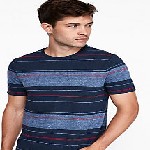

In [14]:
test_image = image.load_img('data/test/t2.png', target_size = (150, 150))
test_image

In [15]:
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = dressPredictor.predict(test_image)
print(result)
if result[0][0] == 1:
    prediction = 'good_Attire'
else:
    prediction = 'bad_Attire'
    
print('Flag: ',prediction)

[[0.]]
Flag:  bad_Attire


# 7.0 Model Visualization

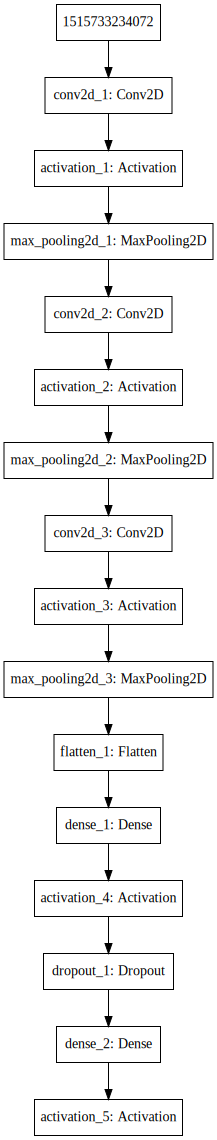

In [16]:
SVG(model_to_dot(dressPredictor).create(prog='dot', format='svg'))


In [17]:
dressPredictor.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 64)        18496     
__________

# 8.0 References
- https://keras.io/
- https://en.wikipedia.org/wiki/Deep_learning
- https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html
- https://towardsdatascience.com/